### Intellisense & History

In [1]:
%config IPCompleter.greedy=True

In [ ]:
%history

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Data_Preprocessing/Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Creating Independent(Features) and Dependent(Response) variables

In [133]:
X=df.iloc[:,:-1].values # features
y=df.iloc[:,-1].values # target

### Imputation

In [134]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values="NaN",strategy='mean',axis=0)
X[:,1:3]=imp.fit_transform(X[:,1:3])

### Categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X[:,0]=LabelEncoder().fit_transform(X[:,0])
X=OneHotEncoder(categorical_features=[0],sparse=False).fit_transform(X).astype(int)
y=LabelEncoder().fit_transform(y)

### Train Test Split

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

### Feature Scaling

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [142]:
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [157]:
mx=MinMaxScaler()
X_train=mx.fit_transform(X_train)
X_test=mx.transform(X_test)

### Simple Linear Regression

In [160]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Simple_Linear_Regression/Salary_Data.csv')

In [170]:
X=df.iloc[:,0].values # features
y=df.iloc[:,1].values # target

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [216]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg=linreg.fit(X_train.reshape(X_train.size,-1),y_train)
print("R2 Training: {:.2f}".format(linreg.score(X_train.reshape(X_train.size,-1),y_train)))
print("R2 Test: {:.2f}".format(linreg.score(X_test.reshape(X_test.size,-1),y_test)))
y_pred=linreg.predict(y_test.reshape(X_test.size,-1))

R2 Training: 0.94
R2 Test: 0.97


Text(0.5, 1.0, 'SLR')

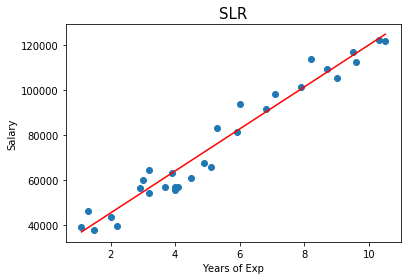

In [240]:
plt.scatter(X,y)
plt.plot(X,linreg.predict(X.reshape(X.size,-1)),color='red')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.title('SLR',fontdict={'fontsize':15})

### Multiple Regression

In [7]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Multiple_Linear_Regression/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X[:,3]=LabelEncoder().fit_transform(X[:,3])
X=OneHotEncoder(categorical_features=[3],sparse=False).fit_transform(X).toarray()
X=X[:,1:] # minus a dummy variable

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg=linreg.fit(X_train,y_train)
print("R2 Training: {:.2f}".format(linreg.score(X_train,y_train)))
print("R2 Test: {:.2f}".format(linreg.score(X_test,y_test)))
y_pred=linreg.predict(X_test)

R2 Training: 0.95
R2 Test: 0.93


### Backward Elimination

In [36]:
import statsmodels.api as sm

In [37]:
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1) #appending for calculating intercept in OLS model below
X_opt=X[:,0:5]

In [42]:
regmodel=sm.OLS(endog=y,exog=X_opt).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.90e-28
Time:                        11:08:45   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.461e+04   6371.081      8.571      0.000    4.18e+04    6.74e+04
x1          1091.0715   3377.106      0.323      0.748   -5710.770    7892.913
x2           -39.4697   3309.066     -0.012      0.991   -6704.271    6625.332
x3             0.8609      0.031     27.665      0.000       0.798       0.924
x4            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.276   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.262
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     7.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_opt=X[:,[0,1,3,4,5]]
regmodel=sm.OLS(endog=y,exog=X_opt).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           8.49e-29
Time:                        11:09:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.901      7.537      0.000    3.67e+04    6.35e+04
x1           220.1847   2900.553      0.076      0.940   -5621.828    6062.197
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.759   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.173
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_opt=X[:,[0,3,4,5]]
regmodel=sm.OLS(endog=y,exog=X_opt).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.53e-30
Time:                        11:10:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.384      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_opt=X[:,[0,3,5]]
regmodel=sm.OLS(endog=y,exog=X_opt).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.16e-31
Time:                        11:15:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.941     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.265      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Function to automate Backward Elimination Process(Adj R2 & p-values)

In [50]:
import statsmodels.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [ ]:
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

### Polynomial Regression

In [3]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Polynomial_Regression/Position_Salaries.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
X=df.iloc[:,1].values
y=df.iloc[:,-1:].values

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=5)
X_poly=poly.fit_transform(X.reshape(X.size,-1))
model_poly=LinearRegression().fit(X_poly,y)

Text(0, 0.5, 'Salary')

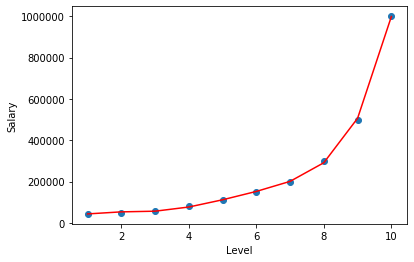

In [34]:
plt.scatter(X,y)
plt.plot(X,model_poly.predict(poly.fit_transform(X.reshape(X.size,-1))),color='red')
plt.xlabel('Level')
plt.ylabel('Salary')

In [45]:
model_poly.predict(poly.fit_transform(np.array(6.5).reshape(1,1)))

array([[174878.07765118]])

### Support Vector Regression

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X.reshape(X.size,-1))
y=sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
model_SVR=SVR(kernel='rbf').fit(X,y)

Text(0, 0.5, 'Salary')

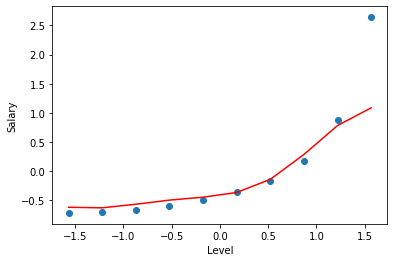

In [18]:
plt.scatter(X,y)
plt.plot(X,model_SVR.predict(X.reshape(X.size,-1)),color='red')
plt.xlabel('Level')
plt.ylabel('Salary')

In [28]:
y_pred=model_SVR.predict(sc_X.transform(np.array(6.5).reshape(1,1)))
sc_y.inverse_transform(y_pred)

array([170370.0204065])

### Decision Regression Tree

In [29]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Decision_Tree_Regression/Position_Salaries.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [30]:
X=df.iloc[:,1].values
y=df.iloc[:,-1:].values

In [33]:
from sklearn.tree import DecisionTreeRegressor
model_Tree=DecisionTreeRegressor().fit(X.reshape(X.size,-1),y)

In [35]:
model_Tree.predict(np.array(6.5).reshape(1,1))

array([150000.])

### Random Forrest Tree

In [3]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Random_Forest_Regression/Position_Salaries.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X=df.iloc[:,1].values
y=df.iloc[:,-1:].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=300).fit(X.reshape(X.size,-1),y)

In [9]:
model_rf.predict(np.array(6.5).reshape(1,1))

array([159000.])

## Classification

### Logistic Regression

In [136]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Logistic_Regression/Social_Network_Ads.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [149]:
X=df.iloc[:,1:4].values
y=df.iloc[:,-1:].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X[:,0]=LabelEncoder().fit_transform(X[:,0])
X=OneHotEncoder(categorical_features=[0],sparse=False).fit_transform(X).astype(int)
y=LabelEncoder().fit_transform(y.reshape(y.size,-1))

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [152]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logreg=LogisticRegression(random_state=0).fit(X_train,y_train)

In [55]:
y_pred=model_logreg.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [57]:
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

Accuracy:  92.5 %


### K-NN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model_knn=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

In [61]:
y_pred=model_knn.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [63]:
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

Accuracy:  95.0 %


### Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [77]:
model_svc=SVC(kernel='linear').fit(X_train,y_train)

In [78]:
y_pred=model_svc.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  1],
       [ 6, 16]], dtype=int64)

In [80]:
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

Accuracy:  91.25 %


### Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB().fit(X_train,y_train)

In [154]:
y_pred=model_nb.predict(X_test)

In [156]:
cm=confusion_matrix(y_test,y_pred)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

Accuracy:  92.5 %


### Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [160]:
y_pred=model_tree.predict(X_test)

In [161]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

[[54  4]
 [ 4 18]]
Accuracy:  90.0 %


### Random Forrest

In [165]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(criterion='entropy',n_estimators=20).fit(X_train,y_train)

In [166]:
y_pred=model_rf.predict(X_test)

In [167]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

[[54  4]
 [ 1 21]]
Accuracy:  93.75 %


### K-Means Clustering

In [3]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/K_Means/Mall_Customers.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

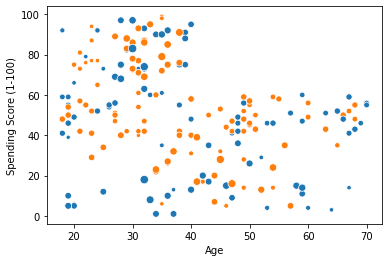

In [41]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],hue=df['Genre'],size=df['Annual Income (k$)'],legend=False)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [132]:
X=df.iloc[:,1:].values
X[:,0]=LabelEncoder().fit_transform(X[:,0]) #genre encoding
#X=StandardScaler().fit_transform(X) #scaling all

In [124]:
# finding the optimal no. of clusters
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10,
    max_iter=300,random_state=0).fit(X)
    wcss.append(km.inertia_)

Text(0.5, 0, 'No. of Clusters')

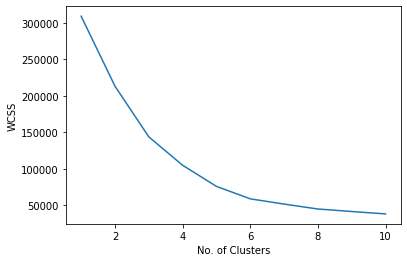

In [125]:
plt.plot(np.arange(1,11),wcss)
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters')

In [133]:
km=KMeans(n_clusters=5,random_state=0,init='k-means++',n_init=10,
    max_iter=300).fit(X)

In [134]:
y_means=km.fit_predict(X)

In [135]:
df['Cluster']=y_means
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


Text(0, 0.5, 'Spending Score (1-100)')

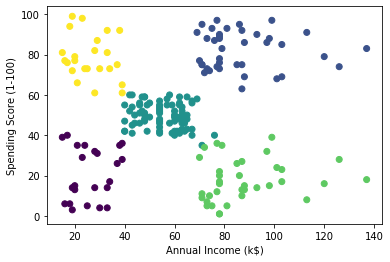

In [147]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Hierarchial Clustering

In [214]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Hierarchical_Clustering/Mall_Customers.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [230]:
X=df.iloc[:,1:].values
X[:,0]=LabelEncoder().fit_transform(X[:,0])
#X=StandardScaler().fit_transform(X)

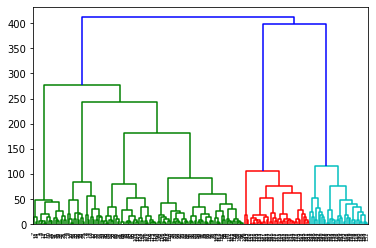

In [231]:
# Dendogram
import scipy.cluster.hierarchy as sch
den=sch.dendrogram(sch.linkage(X,method='ward'))

In [236]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

In [237]:
y_hc=hc.fit_predict(X)

In [238]:
df['Cluster']=y_hc

Text(0, 0.5, 'Spending Score (1-100)')

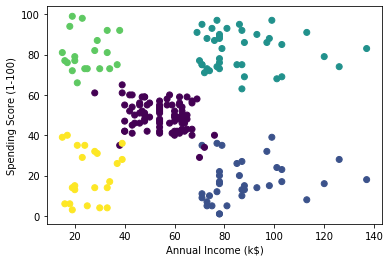

In [239]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Model Selection: Cross Validation

In [240]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Model_Selection/Social_Network_Ads.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [303]:
X=df.iloc[:,1:4].values
y=df.iloc[:,-1:].values

In [311]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X[:,0]=LabelEncoder().fit_transform(X[:,0])
y=LabelEncoder().fit_transform(y)

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [336]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(criterion='gini',n_estimators=7,random_state=0,max_depth=3).fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

In [337]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=model_rf,X=X_train,y=y_train,cv=10)
print('10-Fold Cross Validation Accuracy: {:.2f}'.format(accuracies.mean()*100),'%')
print('10-Fold Cross Validation Std.Dev: {:.2f}'.format(accuracies.std()*100),'%')

10-Fold Cross Validation Accuracy: 90.34 %
10-Fold Cross Validation Std.Dev: 5.09 %


In [338]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

[[55  3]
 [ 1 21]]
Accuracy:  95.0 %


### Parameter Tuning: Grid Search

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
parameters=[{'criterion':['gini'],'n_estimators':[5,10,15,20,30,50],'max_depth':[1,2,3,4,5,6,7,8,9,10]},
           {'criterion':['entropy'],'n_estimators':[5,10,15,20,30,50],'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

In [325]:
#parameters=[{'criterion':['gini'],'n_estimators':[1,2,3,4,5,6,7,8,9,10]}]

In [326]:
grid_search=GridSearchCV(estimator=model_rf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [327]:
grid_search=grid_search.fit(X_train,y_train)

In [328]:
best_accuracy=grid_search.best_score_
best_param=grid_search.best_params_

In [329]:
print(best_accuracy)
print(best_param)

0.903125
{'criterion': 'gini', 'n_estimators': 7}


### XGBoost

In [4]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/XGBoost/Churn_Modelling.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
X=df.iloc[:,3:].values
y=df.iloc[:,13].values

In [23]:
from sklearn.preprocessing import LabelEncoder
X[:,1]=LabelEncoder().fit_transform(X[:,1])
X[:,2]=LabelEncoder().fit_transform(X[:,2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X=OneHotEncoder(categorical_features=[1]).fit_transform(X).toarray().astype(int)
X=X[:,1:]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [27]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier().fit(X_train,y_train)

In [28]:
y_pred=model_xgb.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

[[1595    0]
 [   0  405]]
Accuracy:  100.0 %


In [30]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=model_xgb,X=X,y=y,cv=10)
print('10-Fold Cross Validation Accuracy: {:.2f}'.format(accuracies.mean()*100),'%')
print('10-Fold Cross Validation Std.Dev: {:.2f}'.format(accuracies.std()*100),'%')

10-Fold Cross Validation Accuracy: 100.00 %
10-Fold Cross Validation Std.Dev: 0.00 %


## Dimensionality Reduction

### Principal Component Analysis PCA

In [10]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/PCA/Wine.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [27]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
exp_var=pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lgr=LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=model_lgr.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1]+cm[2,2])/cm.sum())*100, '%')

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy:  97.22222222222221 %


### Linear Discriminant Analysis LDA

In [46]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/PCA/Wine.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [47]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lgr=LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=model_lgr.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1]+cm[2,2])/cm.sum())*100, '%')

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy:  100.0 %


### Kernel PCA (non linear problems)

In [54]:
df=pd.read_csv('C:/Users/Pratik/Documents/Practice Datasets/Kernel_PCA/Social_Network_Ads.csv')
print('Row x Column: ', df.shape)
df.head()

Row x Column:  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [60]:
X=df.iloc[:,1:4].values
y=df.iloc[:,-1].values

In [64]:
from sklearn.preprocessing import LabelEncoder
X[:,0]=LabelEncoder().fit_transform(X[:,0])

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [70]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lgr=LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=model_lgr.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy: ',((cm[0,0]+cm[1,1])/cm.sum())*100, '%')

[[55  3]
 [ 5 17]]
Accuracy:  90.0 %
